In [18]:
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 18.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 1.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
      NumExpr defaulting to 8 threads.
      Traceback (most recent call last):
        File "<s

Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
  Running setup.py install for fbprophet ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      running install
      /Users/fdave/opt/anaconda3/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
      NumExpr defaulting to 8 threads.
      Traceback (most recent call last):

In [82]:
# Python
import pandas as pd
from prophet import Prophet
import os 

In [45]:
# Crypto data prediction
df = pd.read_csv('../data/crypto.csv')
df.head()

,high,low,open,close,volume,date,ticker
0,9505.051758,9191.485352,9235.607422,9412.612305,26170255634,2019-11-04,BTC
1,9457.417969,9256.931641,9413.004883,9342.527344,26198609048,2019-11-05,BTC
2,9423.237305,9305.909180,9340.864258,9360.879883,23133895765,2019-11-06,BTC
3,9368.476562,9202.353516,9352.393555,9267.561523,22700383839,2019-11-07,BTC
4,9272.759766,8775.534180,9265.368164,8804.880859,24333037836,2019-11-08,BTC


In [59]:
prophet_df=pd.DataFrame()
newdf=df[df['ticker']=="BTC"]

prophet_df = newdf.rename(columns = {"date":"ds","close":"y"}) 
# prophet_df[["ds","y"]] = newdf[["date","close"]]

prophet_df.head()

,high,low,open,y,volume,ds,ticker
0,9505.051758,9191.485352,9235.607422,9412.612305,26170255634,2019-11-04,BTC
1,9457.417969,9256.931641,9413.004883,9342.527344,26198609048,2019-11-05,BTC
2,9423.237305,9305.909180,9340.864258,9360.879883,23133895765,2019-11-06,BTC
3,9368.476562,9202.353516,9352.393555,9267.561523,22700383839,2019-11-07,BTC
4,9272.759766,8775.534180,9265.368164,8804.880859,24333037836,2019-11-08,BTC


In [61]:
m = Prophet(daily_seasonality = True)
m.fit(prophet_df[['ds','y']])

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [64]:
# Python
future = m.make_future_dataframe(periods=30)
future.head()

,ds
0,2019-11-04
1,2019-11-05
2,2019-11-06
3,2019-11-07
4,2019-11-08


In [81]:
# Python
forecast = m.predict(future)

# forecast.head()
forecast["ticker"]='BTC'
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','ticker']].tail(30)


,ds,yhat,yhat_lower,yhat_upper,ticker
943,2022-11-09,37.727753,22.427394,52.552372,BTC
944,2022-11-10,37.337473,22.200041,50.841604,BTC
945,2022-11-11,36.499666,21.589077,51.442782,BTC
946,2022-11-12,36.558127,21.496481,51.846633,BTC
947,2022-11-13,35.924074,20.656252,50.307275,BTC
948,2022-11-14,34.649077,18.479667,48.621284,BTC
949,2022-11-15,33.593991,19.307895,49.373944,BTC
950,2022-11-16,33.173299,17.645459,48.088606,BTC
951,2022-11-17,31.875457,16.789991,45.405821,BTC
952,2022-11-18,30.131820,15.620218,45.108655,BTC


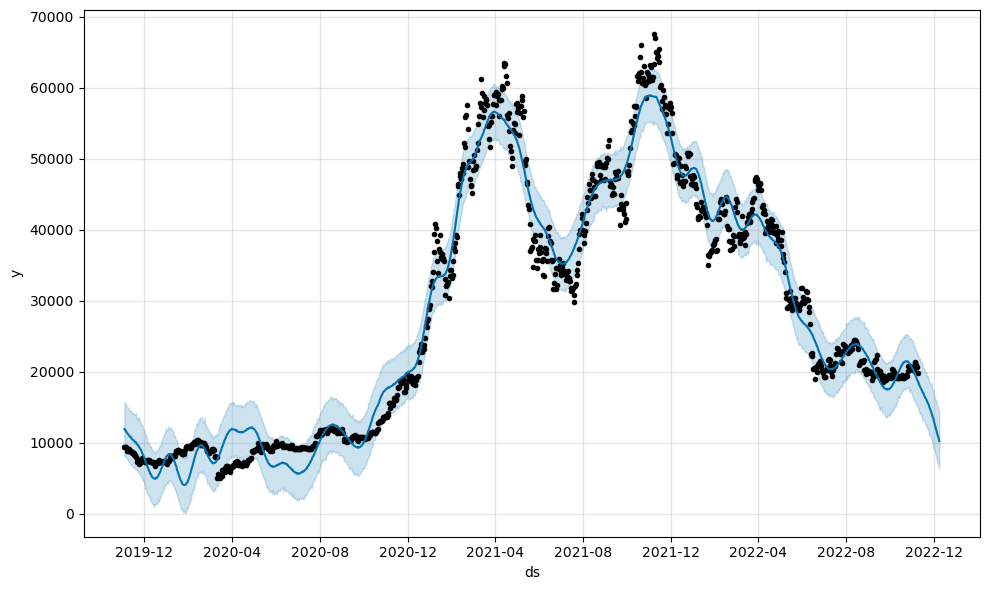

In [72]:
# Python
fig1 = m.plot(forecast)


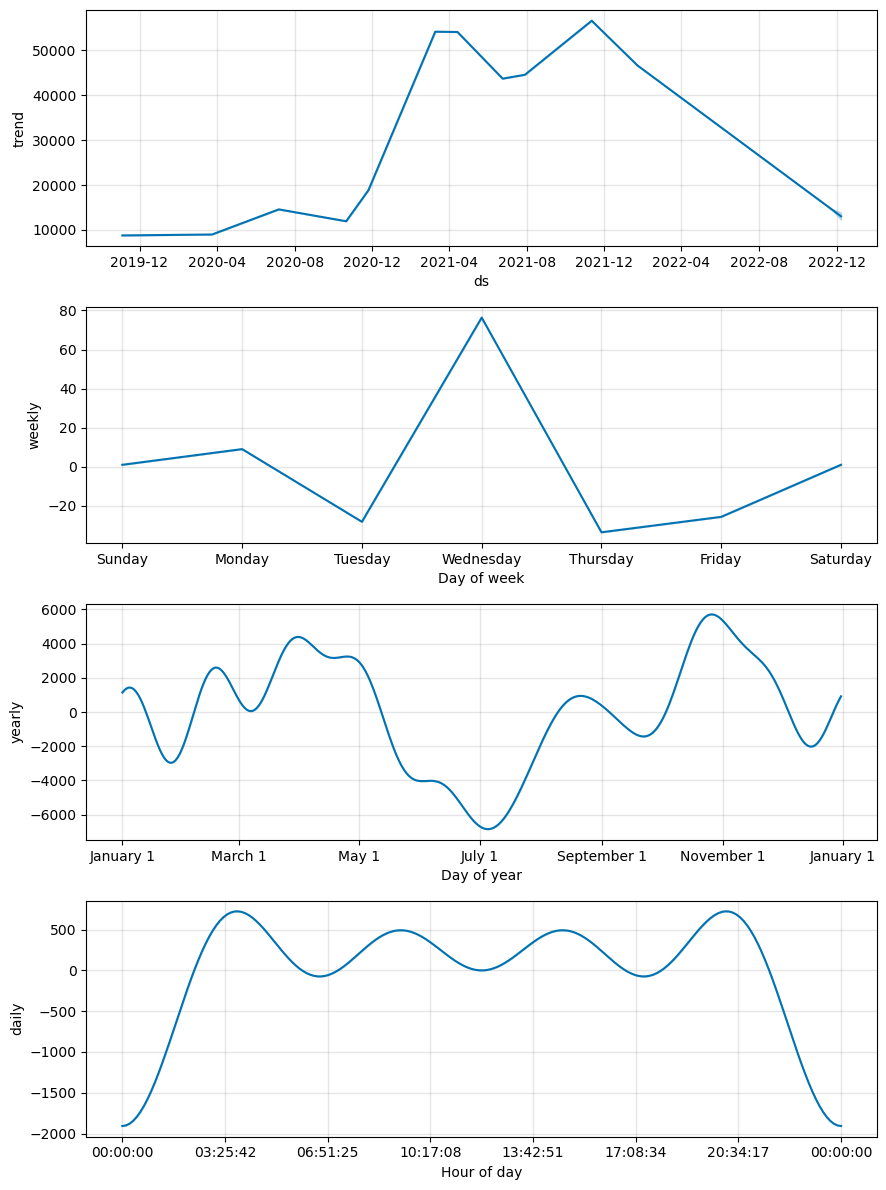

In [73]:
# Python
fig2 = m.plot_components(forecast)


In [74]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [75]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='90 days', horizon = '30 days',parallel="processes")


INFO:prophet:Making 8 forecasts with cutoffs between 2021-01-17 00:00:00 and 2022-10-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb9b28e0ee0>
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 1


deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmp7_vh42q6
done
deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmpldna1i6h
done
deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmp9r6iamrw
done
deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmpng_kwysd
done
deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmplrlx8999
done
deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmp_adb62st
done
deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmpn10nzl7p
done
deleting tmpfiles dir: /var/folders/01/32b7ssj95lgfnc56qzqksjzr0000gn/T/tmpsu0zhh1f
done


In [76]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.807381e+07,4251.330691,3407.103414,0.079909,0.080834,0.079007,0.583333
1,4 days,2.366970e+07,4865.151219,3801.290183,0.092659,0.087020,0.089909,0.625000
2,5 days,3.271226e+07,5719.463458,4439.864230,0.109621,0.093651,0.105595,0.625000
3,6 days,4.516562e+07,6720.537302,5216.192605,0.129331,0.111795,0.123563,0.541667
4,7 days,5.276450e+07,7263.917586,5762.675150,0.144890,0.133498,0.138792,0.458333


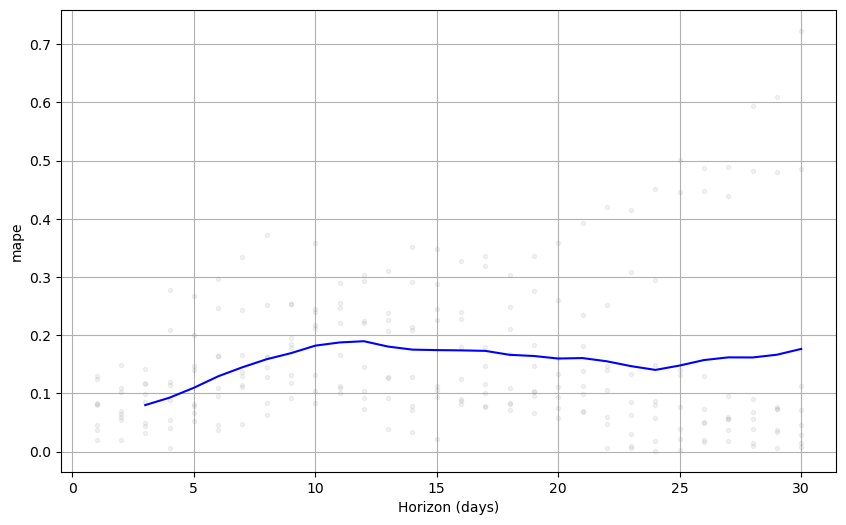

In [77]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')